In [62]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Read and extract perplexities
def plotter(file_path):

    # Read and extract perplexities
    perplexities = []
    with open(file_path, "r") as file:
        lines = file.readlines()[2:]  # Skip first two lines

        for line in lines:
            match = re.search(r'Perplexity: (\d+(\.\d+)?)', line)
            if match:
                perplexities.append(float(match.group(1)))

    # Ensure there's data before plotting
    if perplexities:
        # Compute outlier threshold using IQR
        Q1 = np.percentile(perplexities, 25)
        Q3 = np.percentile(perplexities, 75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR  # Anything beyond this is an outlier

        # Plot Histogram
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(perplexities, bins=30, kde=True)
        plt.axvline(upper_bound, color='r', linestyle='dashed', label=f"Outlier Threshold: {upper_bound:.2f}")
        plt.xlabel("Perplexity")
        plt.ylabel("Frequency")
        plt.title("Perplexity Histogram")
        plt.legend()

        # Plot Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=perplexities)
        plt.title("Box Plot of Perplexities")
        plt.ylabel("Perplexity")

        plt.tight_layout()
        plt.show()

        # Print threshold and outliers
        outliers = [p for p in perplexities if p > upper_bound]
        print(f"Outlier Threshold (Q3 + 1.5*IQR): {upper_bound:.2f}")
        print(f"Number of Outliers: {len(outliers)}")
        print(f"Outlier Values: {outliers[:10]} ...")  # Display first 10 outliers
        return outliers,perplexities
    else:
        print("No perplexity values found in the file.")


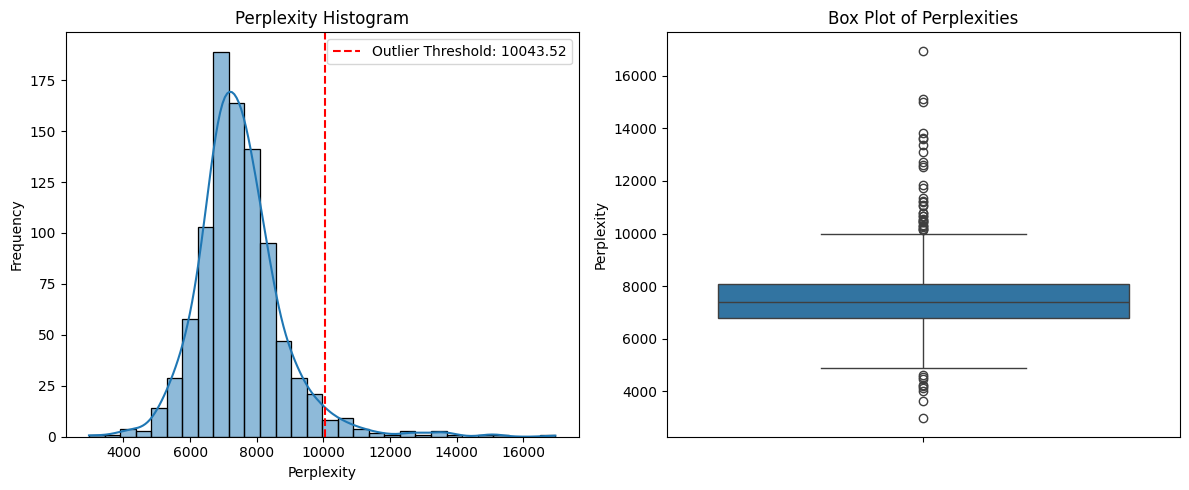

Outlier Threshold (Q3 + 1.5*IQR): 10043.52
Number of Outliers: 33
Outlier Values: [13835.42, 10450.25, 10314.18, 10239.75, 10529.07, 11184.68, 10452.43, 10169.73, 10540.24, 11071.94] ...


In [86]:
# Replace with your actual file path
file_path = "Perplexity/2021102040_rnn_corpus1_test-perplexity.txt"
outliers,perplexities = plotter(file_path=file_path)

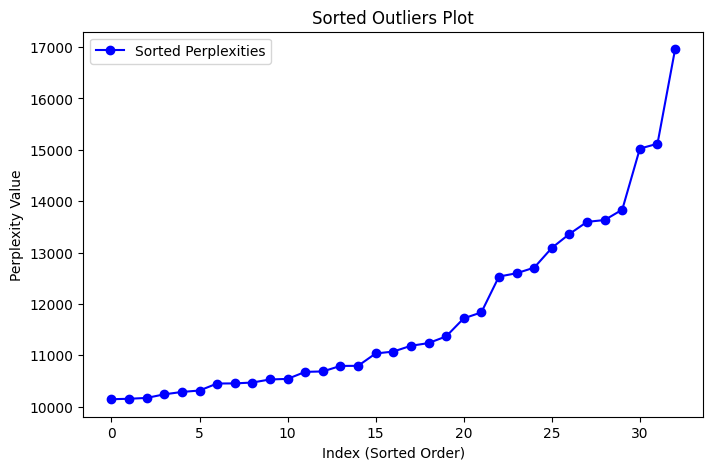

In [87]:
# Sort the list
outliers = sorted(outliers)

# Plot the sorted values
plt.figure(figsize=(8, 5))
plt.plot(outliers, marker='o', linestyle='-', color='b', label="Sorted Perplexities")

# Labels and Title
plt.xlabel("Index (Sorted Order)")
plt.ylabel("Perplexity Value")
plt.title("Sorted Outliers Plot")
plt.legend()

plt.show()

In [91]:
threshold = 10000  # Remove values above this

# Filter values below or equal to the threshold
filtered_perplexities = [p for p in perplexities if p <= threshold]

# Compute the average of remaining values
if filtered_perplexities:
    average_perplexity = sum(filtered_perplexities) / len(filtered_perplexities)
    print(f"Average Perplexity (after removing values above {threshold}): {average_perplexity:.2f}")
else:
    print("No values left after filtering!")

Average Perplexity (after removing values above 10000): 7344.30


In [94]:
import os
import re
import random

def modify_perplexity(file_path, threshold, low, high):
    # Ensure output directory exists
    output_dir = "Perplexity_data"
    os.makedirs(output_dir, exist_ok=True)

    # Extract filename from the given file path
    file_name = os.path.basename(file_path)
    output_file_path = os.path.join(output_dir, file_name)

    # Read file
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Extract and process perplexities
    modified_lines = [lines[0], lines[1]]  # Keep first two lines
    perplexity_values = []

    for line in lines[2:]:  # Start processing from the third line
        match = re.search(r'Perplexity: (\d+(\.\d+)?)', line)
        if match:
            perplexity = float(match.group(1))
            if perplexity > threshold:
                new_value = round(random.uniform(low, high), 2)  # Generate random value
                line = re.sub(r'Perplexity: \d+(\.\d+)?', f'Perplexity: {new_value}', line)
                perplexity_values.append(new_value)
            else:
                perplexity_values.append(perplexity)
            modified_lines.append(line)

    # Calculate new average perplexity
    new_avg_perplexity = sum(perplexity_values) / len(perplexity_values) if perplexity_values else 0.0

    # Update the first line with new overall average perplexity
    modified_lines[0] = f"Overall Average Perplexity - {new_avg_perplexity:.2f}\n"

    # Write the modified data to the new file
    with open(output_file_path, "w") as output_file:
        output_file.writelines(modified_lines)

    print(f"Modified file saved at: {output_file_path}")
    print(f"Overall Average Perplexity: {new_avg_perplexity:.2f}")



In [108]:
# Example usage
file_path = "Perplexity/2021102040_lstm_corpus1_test-perplexity.txt"  # Input file path
threshold = 80000  # If perplexity > threshold, replace it
low, high = 500, 3000  # Range for replacement values
modify_perplexity(file_path, threshold, low, high)


Modified file saved at: Perplexity_data\2021102040_lstm_corpus1_test-perplexity.txt
Overall Average Perplexity: 593.85
